In [2]:
import pandas as pd

In [3]:
import pandas as pd
import os

# Specify the directory containing the CSV files
csv_dir = 'D:\Project Horse'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(csv_dir) if f.endswith('.csv')]

# Initialize an empty list to hold DataFrames
dfs = []

# Loop through the CSV files and read each one into a DataFrame
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)


<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12892\896220201.py:5: SyntaxWarning: invalid escape sequence '\P'
  csv_dir = 'D:\Project Horse'


In [4]:
combined_df

,rid,course,time,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,272927,Fairyhouse (IRE),01:15,91/01/01,Father Time U.S.D. Handicap Chase,NaN,NaN,5yo+,3m,Soft,15 fences,[],390.30,NaN,4827.0,IE,5,0,NaN
1,281581,Cheltenham,03:40,91/01/01,Woodmancote Novices' Hurdle,NaN,NaN,5yo+,2m4½f,Good To Soft,10 hurdles,"[3418.0, 1024.0, 492.0, 226.0]",335.20,5160.0,4122.5,GB,10,0,NaN
2,285620,Lingfield (AW),01:55,91/01/01,'bald Coot' Handicap,NaN,0-100,4yo+,5f,Standard,NaN,"[4753.0, 1414.0, 672.0, 301.0]",58.68,7140.0,1005.0,GB,0,0,NaN
3,287794,Leicester,03:30,91/01/01,Glebe Handicap Hurdle,NaN,0-115,5yo+,3m,Soft,11 hurdles,"[2227.2, 619.2, 297.6]",379.70,3144.0,4827.0,GB,5,0,NaN
4,290127,Windsor,02:00,91/01/01,New Year's Day Hurdle,NaN,NaN,4yo+,2m,Good,NaN,"[13656.25, 4150.0, 2037.5, 981.25]",234.30,20825.0,3218.0,GB,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369712,415086,Hanshin (JPN),06:45,20/12/05 00:00,Challenge Cup (Grade 3) (3yo+) (Turf),NaN,NaN,3yo+,1m2f,Firm,NaN,"[287256.19, 111820.64, 69792.46, 43034.64, 284...",119.90,540362.0,2011.0,JP,8,0,GBP
369713,415087,Los Alamitos (USA),10:30,20/12/05 00:00,Starlet Stakes (Grade 1) (2yo Fillies) (Main T...,NaN,NaN,2yo,1m½f,Fast,NaN,"[136466.17, 46240.6, 28195.49, 14661.65, 9022.56]",104.53,234587.0,1709.5,US,7,0,GBP
369714,415088,Nakayama (JPN),06:25,20/12/05 00:00,Sports Nippon Sho Stayers Stakes (Grade 2) (3y...,NaN,NaN,3yo+,2m2f,Good,NaN,"[438217.53, 175775.66, 112181.58, 64551.95, 43...",232.00,833763.0,3620.0,JP,1,0,GBP
369715,415089,Tampa Bay Downs (USA),05:10,20/12/05 00:00,Maiden Claiming Race (2yo) (Turf),NaN,NaN,2yo,1m,Firm,NaN,"[6334.59, 2030.08, 1015.04, 609.02, 101.5, 101...",99.34,10601.0,1609.0,US,8,0,GBP


In [5]:
columns_to_drop = ['rid', 'time']

df_cleaned = combined_df.drop(columns=columns_to_drop)
df = df_cleaned

In [6]:
def parse_date(date_str):
    formats = ["%y/%m/%d %H:%M", "%y/%m/%d", "%Y/%m/%d %H:%M", "%Y/%m/%d"]
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the parsing function to the 'date' column
df['date'] = df['date'].apply(parse_date)

In [7]:
list_columns = ['prizes']

# Convert string representation of lists to actual lists
df['prizes'] = df['prizes'].apply(lambda x: eval(x) if pd.notna(x) else [])

# Explode the specified columns into separate rows
df_expanded = df.explode('prizes').reset_index(drop=True)


In [8]:
df_expanded

,course,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,Fairyhouse (IRE),1991-01-01,Father Time U.S.D. Handicap Chase,NaN,NaN,5yo+,3m,Soft,15 fences,NaN,390.30,NaN,4827.0,IE,5,0,NaN
1,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,NaN,NaN,5yo+,2m4½f,Good To Soft,10 hurdles,3418.0,335.20,5160.0,4122.5,GB,10,0,NaN
2,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,NaN,NaN,5yo+,2m4½f,Good To Soft,10 hurdles,1024.0,335.20,5160.0,4122.5,GB,10,0,NaN
3,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,NaN,NaN,5yo+,2m4½f,Good To Soft,10 hurdles,492.0,335.20,5160.0,4122.5,GB,10,0,NaN
4,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,NaN,NaN,5yo+,2m4½f,Good To Soft,10 hurdles,226.0,335.20,5160.0,4122.5,GB,10,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589489,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589490,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589491,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589492,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,NaN,NaN,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP


In [9]:
df = df_expanded

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589494 entries, 0 to 1589493
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1589494 non-null  object        
 1   date         1589494 non-null  datetime64[ns]
 2   title        1589493 non-null  object        
 3   rclass       962949 non-null   object        
 4   band         650242 non-null   object        
 5   ages         1544788 non-null  object        
 6   distance     1589494 non-null  object        
 7   condition    1589362 non-null  object        
 8   hurdles      443003 non-null   object        
 9   prizes       1575027 non-null  object        
 10  winningTime  1589494 non-null  float64       
 11  prize        1575027 non-null  float64       
 12  metric       1589494 non-null  float64       
 13  countryCode  1589494 non-null  object        
 14  ncond        1589494 non-null  object        
 15  class        15

In [11]:
df["rclass"].unique()

array([nan, 'Class 6', 'Class 4', 'Class 5', 'Class 2', 'Class 1',
       'Class 3', 'Class 7'], dtype=object)

In [12]:
mode_value = df['rclass'].mode()[0]  # Calculate the mode (returns a series, so we take the first value)
df['rclass'] = df['rclass'].fillna(mode_value)

In [13]:
df["rclass"].isnull

<bound method Series.isnull of 0          Class 4
1          Class 4
2          Class 4
3          Class 4
4          Class 4
            ...   
1589489    Class 4
1589490    Class 4
1589491    Class 4
1589492    Class 4
1589493    Class 4
Name: rclass, Length: 1589494, dtype: object>

In [14]:
null_count = df['band'].isnull().sum()

In [15]:
null_count

939252

In [16]:
mode_value = df['band'].mode()[0]  # Calculate the mode (returns a series, so we take the first value)
df['band'] = df['band'].fillna(mode_value)

In [17]:
df["ages"].unique()

array(['5yo+', '4yo+', '6yo+', '5-8yo', '4-6yo', '4yo', '3yo', '5yo',
       '6-8yo', '4-5yo', '5-6yo', '5-7yo', '3yo+', nan, '2yo', '3-4yo',
       '4-7yo', '3-5yo', '2yo+', '3-6yo', '2-3yo', '6yo', '7yo+', '6-9yo',
       '8yo+', '6-7yo', '9yo+', '4-8yo', '10yo+'], dtype=object)

In [18]:
mode_value = df['ages'].mode()[0]  # Calculate the mode (returns a series, so we take the first value)
df['ages'] = df['ages'].fillna(mode_value)

In [19]:
df

,course,date,title,rclass,band,ages,distance,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency
0,Fairyhouse (IRE),1991-01-01,Father Time U.S.D. Handicap Chase,Class 4,0-70,5yo+,3m,Soft,15 fences,NaN,390.30,NaN,4827.0,IE,5,0,NaN
1,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,2m4½f,Good To Soft,10 hurdles,3418.0,335.20,5160.0,4122.5,GB,10,0,NaN
2,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,2m4½f,Good To Soft,10 hurdles,1024.0,335.20,5160.0,4122.5,GB,10,0,NaN
3,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,2m4½f,Good To Soft,10 hurdles,492.0,335.20,5160.0,4122.5,GB,10,0,NaN
4,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,2m4½f,Good To Soft,10 hurdles,226.0,335.20,5160.0,4122.5,GB,10,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589489,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589490,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589491,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP
1589492,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,1m,Soft,NaN,2030.46,99.66,95428.0,1609.0,NZ,5,0,GBP


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589494 entries, 0 to 1589493
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1589494 non-null  object        
 1   date         1589494 non-null  datetime64[ns]
 2   title        1589493 non-null  object        
 3   rclass       1589494 non-null  object        
 4   band         1589494 non-null  object        
 5   ages         1589494 non-null  object        
 6   distance     1589494 non-null  object        
 7   condition    1589362 non-null  object        
 8   hurdles      443003 non-null   object        
 9   prizes       1575027 non-null  object        
 10  winningTime  1589494 non-null  float64       
 11  prize        1575027 non-null  float64       
 12  metric       1589494 non-null  float64       
 13  countryCode  1589494 non-null  object        
 14  ncond        1589494 non-null  object        
 15  class        15

In [21]:
df["band"].unique()

array(['0-70', '0-100', '0-115', '0-125', '0-135', '0-90', '0-80',
       '0-105', '0-60', '0-145', '0-140', '0-120', '0-130', '0-110',
       '0-95', '0-85', '0-75', '0-150', '0-65', '0-155', '0-123', '0-109',
       '0-116', '0-102', '0-112', '0-137', '95-116', '0-144', '88-116',
       '0-55', '0-50', '75-95', '0-99', '102-123', '0-114', '0-113',
       '95-109', '0-132', '60-90', '67-95', '88-109', '0-127', '0-133',
       '0-106', '50-85', '55-90', '50-95', '50-90', '0-92', '0-72',
       '0-126', '0-160', '0-88', '0-82', '60-95', '60-92', '0-77',
       '50-87', '60-99', '45-70', '67-102', '0-78', '60-93', '65-95',
       '60-105', '0-68', '74-102', '60-100', '70-102', '70-109', '74-109',
       '--', '60-81', '60-88', '67-109', '81-123', '74-116', '50-80',
       '40-70', '65-97', '0-86', '0-84', '0-81', '0-73', '81-116',
       '67-88', '88-130', '55-75', '0-74', '0-71', '0-45', '74-95',
       '40-65', '40-75', '81-109', '50-70', '45-75', '50-75', '70-95',
       '70-88', '74-

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589494 entries, 0 to 1589493
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1589494 non-null  object        
 1   date         1589494 non-null  datetime64[ns]
 2   title        1589493 non-null  object        
 3   rclass       1589494 non-null  object        
 4   band         1589494 non-null  object        
 5   ages         1589494 non-null  object        
 6   distance     1589494 non-null  object        
 7   condition    1589362 non-null  object        
 8   hurdles      443003 non-null   object        
 9   prizes       1575027 non-null  object        
 10  winningTime  1589494 non-null  float64       
 11  prize        1575027 non-null  float64       
 12  metric       1589494 non-null  float64       
 13  countryCode  1589494 non-null  object        
 14  ncond        1589494 non-null  object        
 15  class        15

In [23]:
import re

# Conversion factors
MILE_TO_KM = 1.60934
FURLONG_TO_KM = 0.201168

# Function to convert distance string to kilometers
def convert_distance_to_km(distance):
    # Regex to capture miles and furlongs
    match = re.match(r'(?:(\d+)m)?(?:(\d+)f)?(?:\u00BDf)?', distance)
    if not match:
        return None
    
    miles = match.group(1)
    furlongs = match.group(2)
    half_furlong = "\u00BDf" in distance
    
    # Convert to kilometers
    km = 0
    if miles:
        km += int(miles) * MILE_TO_KM
    if furlongs:
        km += int(furlongs) * FURLONG_TO_KM
    if half_furlong:
        km += 0.5 * FURLONG_TO_KM
    
    return km

# Apply the conversion function to the 'distance' column
df['distance_km'] = df['distance'].apply(convert_distance_to_km)



In [24]:
df.drop(columns=['distance'], inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589494 entries, 0 to 1589493
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1589494 non-null  object        
 1   date         1589494 non-null  datetime64[ns]
 2   title        1589493 non-null  object        
 3   rclass       1589494 non-null  object        
 4   band         1589494 non-null  object        
 5   ages         1589494 non-null  object        
 6   condition    1589362 non-null  object        
 7   hurdles      443003 non-null   object        
 8   prizes       1575027 non-null  object        
 9   winningTime  1589494 non-null  float64       
 10  prize        1575027 non-null  float64       
 11  metric       1589494 non-null  float64       
 12  countryCode  1589494 non-null  object        
 13  ncond        1589494 non-null  object        
 14  class        1589494 non-null  int64         
 15  currency     52

In [26]:
df["condition"].unique()

array(['Soft', 'Good To Soft', 'Standard', 'Good', 'Heavy',
       'Good To Yielding', 'Yielding To Soft', 'Yielding', 'Good To Firm',
       'Firm', 'Hard', 'Slow', 'Soft To Heavy', 'Very Soft', 'Holding',
       'Fast', 'Sloppy', 'Muddy', nan, 'Standard To Slow',
       'Standard To Fast', 'Frozen', 'Abandoned'], dtype=object)

In [27]:
df["hurdles"].unique()

array(['15 fences', '10 hurdles', nan, '11 hurdles', '12 fences',
       '8 hurdles', '16 fences', '18 fences', '13 hurdles', '19 fences',
       '9 hurdles', '12 hurdles', '17 fences', '13 fences', '20 fences',
       '14 hurdles', '23 fences', '11 fences', '24 fences', '14 fences',
       '21 fences', '16 hurdles', '22 fences', '25 fences', '30 fences',
       '27 fences', '10 fences', '15 hurdles', '14 fences 2 omitted',
       '11 fences 1 omitted', '17 fences 2 omitted',
       '16 fences 2 omitted', '12 fences 1 omitted',
       '13 fences 2 omitted', '11 fences 2 omitted',
       '17 fences 3 omitted', '14 fences 1 omitted',
       '10 fences 1 omitted', '6 hurdles 2 omitted',
       '10 fences 2 omitted', '14 fences 4 omitted',
       '8 hurdles 2 omitted', '15 fences 2 omitted',
       '7 hurdles 1 omitted', '13 fences 1 omitted',
       '10 hurdles 3 omitted', '17 fences 1 omitted',
       '9 fences 2 omitted', '12 fences 3 omitted', '18 fences 2 omitted',
       '7 hurdles 2

In [28]:

mode_value = df["hurdles"].mode()[0]  # Calculate the mode (returns a series, so we take the first value)
df["hurdles"] = df["hurdles"].fillna(mode_value)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589494 entries, 0 to 1589493
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1589494 non-null  object        
 1   date         1589494 non-null  datetime64[ns]
 2   title        1589493 non-null  object        
 3   rclass       1589494 non-null  object        
 4   band         1589494 non-null  object        
 5   ages         1589494 non-null  object        
 6   condition    1589362 non-null  object        
 7   hurdles      1589494 non-null  object        
 8   prizes       1575027 non-null  object        
 9   winningTime  1589494 non-null  float64       
 10  prize        1575027 non-null  float64       
 11  metric       1589494 non-null  float64       
 12  countryCode  1589494 non-null  object        
 13  ncond        1589494 non-null  object        
 14  class        1589494 non-null  int64         
 15  currency     52

In [30]:
df["prizes"] = pd.to_numeric(df["prizes"], errors='coerce')
df["prize"] = pd.to_numeric(df["prize"], errors='coerce')
df["ncond"] = pd.to_numeric(df["ncond"], errors='coerce')


In [31]:
df

,course,date,title,rclass,band,ages,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,currency,distance_km
0,Fairyhouse (IRE),1991-01-01,Father Time U.S.D. Handicap Chase,Class 4,0-70,5yo+,Soft,15 fences,NaN,390.30,NaN,4827.0,IE,5.0,0,NaN,4.828020
1,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,3418.00,335.20,5160.0,4122.5,GB,10.0,0,NaN,3.319264
2,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,1024.00,335.20,5160.0,4122.5,GB,10.0,0,NaN,3.319264
3,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,492.00,335.20,5160.0,4122.5,GB,10.0,0,NaN,3.319264
4,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,226.00,335.20,5160.0,4122.5,GB,10.0,0,NaN,3.319264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589489,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,2030.46,99.66,95428.0,1609.0,NZ,5.0,0,GBP,1.609340
1589490,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,2030.46,99.66,95428.0,1609.0,NZ,5.0,0,GBP,1.609340
1589491,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,2030.46,99.66,95428.0,1609.0,NZ,5.0,0,GBP,1.609340
1589492,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,2030.46,99.66,95428.0,1609.0,NZ,5.0,0,GBP,1.609340


In [32]:
df["countryCode"].unique()

array(['IE', 'GB', 'FR', 'US', 'GER', 'JP', 'CAN', 'IT', 'AU', 'HK',
       'SWE', 'SIN', 'SWI', 'TUR', 'AE', 'NOR', 'DEN', 'JER', 'SAF',
       'ARAB', 'CHI', 'GUE', 'BRZ', 'NZ', 'CZE', 'URU', 'ARG', 'BEL',
       'MAC', 'SPA', 'PER', 'KOR', 'BHR', 'KSA'], dtype=object)

In [33]:
df.drop(columns=['currency'], inplace=True)

In [34]:
country_currency_map = {
    'IE': 'EUR',
    'GB': 'GBP',
    'FR': 'EUR',
    'US': 'USD',
    'GER': 'EUR',
    'JP': 'JPY',
    'CAN': 'CAD',
    'IT': 'EUR',
    'AU': 'AUD',
    'HK': 'HKD',
    'SWE': 'SEK',
    'SIN': 'SGD',
    'SWI': 'CHF',
    'TUR': 'TRY',
    'AE': 'AED',
    'NOR': 'NOK',
    'DEN': 'DKK',
    'JER': 'JEP',
    'SAF': 'ZAR',
    'ARAB': 'SAR',
    'CHI': 'CLP',
    'GUE': 'GGP',
    'BRZ': 'BRL',
    'NZ': 'NZD',
    'CZE': 'CZK',
    'URU': 'UYU',
    'ARG': 'ARS',
    'BEL': 'EUR',
    'MAC': 'MOP',
    'SPA': 'EUR',
    'PER': 'PEN',
    'KOR': 'KRW',
    'BHR': 'BHD',
    'KSA': 'SAR'
}

# Map the country codes to currencies and create a new column
df['currency'] = df['countryCode'].map(country_currency_map)

In [35]:
df = df.dropna()

In [36]:
df = df.drop_duplicates()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502272 entries, 1 to 1589487
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   course       1502272 non-null  object        
 1   date         1502272 non-null  datetime64[ns]
 2   title        1502272 non-null  object        
 3   rclass       1502272 non-null  object        
 4   band         1502272 non-null  object        
 5   ages         1502272 non-null  object        
 6   condition    1502272 non-null  object        
 7   hurdles      1502272 non-null  object        
 8   prizes       1502272 non-null  float64       
 9   winningTime  1502272 non-null  float64       
 10  prize        1502272 non-null  float64       
 11  metric       1502272 non-null  float64       
 12  countryCode  1502272 non-null  object        
 13  ncond        1502272 non-null  float64       
 14  class        1502272 non-null  int64         
 15  distance_km  1502272

In [38]:
df

,course,date,title,rclass,band,ages,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,distance_km,currency
1,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,3418.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
2,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,1024.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
3,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,492.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
4,Cheltenham,1991-01-01,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,226.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
5,Lingfield (AW),1991-01-01,'bald Coot' Handicap,Class 4,0-100,4yo+,Standard,8 hurdles,4753.00,58.68,7140.0,1005.0,GB,0.0,0,1.005840,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589483,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,54822.34,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589484,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,15228.43,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589485,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,7106.60,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589486,Trentham (NZ),2020-12-05,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,4060.91,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD


In [39]:
df['date'] = df['date'].apply(lambda x: x.timestamp())


In [ ]:
import dtale
#Launch Dtale to explore the sampled DataFrame
d = dtale.show(df)
d.open_browser()

In [40]:
df_encoded = df.copy()

In [41]:
df_encoded

,course,date,title,rclass,band,ages,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,distance_km,currency
1,Cheltenham,6.626880e+08,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,3418.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
2,Cheltenham,6.626880e+08,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,1024.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
3,Cheltenham,6.626880e+08,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,492.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
4,Cheltenham,6.626880e+08,Woodmancote Novices' Hurdle,Class 4,0-70,5yo+,Good To Soft,10 hurdles,226.00,335.20,5160.0,4122.5,GB,10.0,0,3.319264,GBP
5,Lingfield (AW),6.626880e+08,'bald Coot' Handicap,Class 4,0-100,4yo+,Standard,8 hurdles,4753.00,58.68,7140.0,1005.0,GB,0.0,0,1.005840,GBP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589483,Trentham (NZ),1.607126e+09,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,54822.34,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589484,Trentham (NZ),1.607126e+09,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,15228.43,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589485,Trentham (NZ),1.607126e+09,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,7106.60,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD
1589486,Trentham (NZ),1.607126e+09,Rydges Wellington Captain Cook Stakes (Group 1...,Class 4,0-70,2yo+,Soft,8 hurdles,4060.91,99.66,95428.0,1609.0,NZ,5.0,0,1.609340,NZD


In [42]:
df_cat = df.select_dtypes(object)
column_Cat_names = df_cat.columns.tolist()

df_encoded = df.copy()

def encode_cat(df, column_name):
    from sklearn.preprocessing import LabelEncoder

    # Instantiate the LabelEncoder object
    le = LabelEncoder()

    # Fit and transform the specified column
    encoded_column = le.fit_transform(df[column_name])

    # Replace the original column with the encoded values
    df[column_name] = encoded_column

    # Return the modified DataFrame
    return df

for column_name in column_Cat_names:
    df_encoded = encode_cat(df_encoded, column_name)

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [44]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the DataFrame
df_encoded['Cluster'] = kmeans.labels_

# Apply dimensionality reduction (PCA) to reduce the number of features
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(scaled_data)

# Map numerical cluster labels to corresponding labels
cluster_label_mapping = {0: 'Win', 1: 'Loss'}
df_encoded['Cluster'] = df_encoded['Cluster'].map(cluster_label_mapping)


In [45]:
class_distribution = df_encoded['Cluster'].value_counts()
print(class_distribution)

Cluster
Win     1000934
Loss     501338
Name: count, dtype: int64


In [46]:
df.describe()

,date,prizes,winningTime,prize,metric,ncond,class,distance_km
count,1.502272e+06,1.502272e+06,1.502272e+06,1.502272e+06,1.502272e+06,1.502272e+06,1.502272e+06,1.502272e+06
mean,1.257623e+09,6.887734e+03,1.715615e+02,3.663319e+04,2.432928e+03,3.903285e+00,2.525772e+00,2.309534e+00
std,2.407476e+08,3.866715e+04,1.042066e+02,1.503520e+05,1.213405e+03,3.794987e+00,2.287252e+00,1.197633e+00
min,6.626880e+08,1.000000e+00,0.000000e+00,1.000000e+00,8.040000e+02,0.000000e+00,0.000000e+00,1.005840e-01
25%,1.084147e+09,5.000000e+02,8.744000e+01,4.819000e+03,1.407000e+03,1.000000e+00,0.000000e+00,1.408176e+00
50%,1.297469e+09,1.280000e+03,1.267000e+02,8.362000e+03,2.011000e+03,2.000000e+00,3.000000e+00,1.810508e+00
75%,1.461370e+09,3.870970e+03,2.509000e+02,1.969800e+04,3.318500e+03,7.000000e+00,5.000000e+00,3.319264e+00
max,1.607126e+09,7.518797e+06,5.552530e+03,1.503760e+07,7.340500e+03,2.000000e+01,7.000000e+00,7.242032e+00


In [47]:
df.isnull().sum()

course         0
date           0
title          0
rclass         0
band           0
ages           0
condition      0
hurdles        0
prizes         0
winningTime    0
prize          0
metric         0
countryCode    0
ncond          0
class          0
distance_km    0
currency       0
dtype: int64

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, column):
    # Create subplots
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    # Box plot
    sns.boxplot(data=df, x=column, ax=axes[0])
    axes[0].set_title(f'Box Plot for {column}')

    # Distribution plot
    sns.histplot(data=df, x=column, kde=True, bins=50, ax=axes[1])
    axes[1].set_title(f'Distribution Plot for {column}')

    # Violin plot
    sns.violinplot(data=df, x=column, ax=axes[2])
    axes[2].set_title(f'Violin Plot for {column}')

    # Display the figure
    plt.tight_layout()
    plt.show()

In [48]:
#column_names = df.columns.tolist()
#for i in column_names:
    #plot(df,i)

In [49]:
import numpy as np

In [50]:
df_skewed = df_encoded.copy()
def skew (df_skewed,i):
    df_skewed[i] = np.log(df_skewed[i])
    return df_skewed
column_names = df.columns.tolist()
for i in column_names:
    skew(df_skewed,i)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [51]:
df_outlier = df_skewed.copy()
def outlier(df,column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5 * iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5 * iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    return df
column_names = df.columns.tolist()
for i in column_names:
    outlier(df_outlier,i)


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [52]:
df_outlier = df_outlier.dropna()

In [53]:
df_cleaned = df_outlier[~df_outlier.isin([-np.inf]).any(axis=1)]

In [54]:
df_cleaned

,course,date,title,rclass,band,ages,condition,hurdles,prizes,winningTime,prize,metric,countryCode,ncond,class,distance_km,currency,Cluster
2584,5.894403,20.356189,9.341965,1.609438,3.931826,2.639057,2.70805,5.273,7.823846,4.492001,8.166784,7.249215,2.484907,-2.918865,1.791759,0.342295,2.397895,Win
2585,5.894403,20.356189,9.341965,1.609438,3.931826,2.639057,2.70805,5.273,6.539586,4.492001,8.166784,7.249215,2.484907,-2.918865,1.791759,0.342295,2.397895,Win
2586,5.894403,20.356189,9.341965,1.609438,3.931826,2.639057,2.70805,5.273,5.800607,4.492001,8.166784,7.249215,2.484907,-2.918865,1.791759,0.342295,2.397895,Win
2603,5.894403,20.356189,9.341965,1.609438,3.931826,2.639057,2.70805,5.273,7.832490,5.229503,8.175548,7.942718,2.484907,-2.918865,1.791759,1.035441,2.397895,Win
2604,5.894403,20.356189,9.341965,1.609438,3.931826,2.639057,2.70805,5.273,6.548506,5.229503,8.175548,7.942718,2.484907,-2.918865,1.791759,1.035441,2.397895,Win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589380,6.066108,21.197714,11.390701,1.098612,3.931826,2.079442,2.70805,5.273,5.703782,4.786074,9.050054,7.555120,2.484907,-2.918865,1.386294,0.536449,2.397895,Win
1589382,6.066108,21.197714,10.206698,1.386294,3.931826,2.079442,2.70805,5.273,8.139899,5.075799,8.559103,7.788626,2.484907,-2.918865,1.609438,0.881290,2.397895,Win
1589383,6.066108,21.197714,10.206698,1.386294,3.931826,2.079442,2.70805,5.273,6.927803,5.075799,8.559103,7.788626,2.484907,-2.918865,1.609438,0.881290,2.397895,Win
1589384,6.066108,21.197714,10.206698,1.386294,3.931826,2.079442,2.70805,5.273,6.234136,5.075799,8.559103,7.788626,2.484907,-2.918865,1.609438,0.881290,2.397895,Win


In [61]:
# Separate features (X) and target variable (y)
X = df_encoded[["course","date","rclass","band","ages","condition","hurdles","prizes","winningTime","countryCode","distance_km"]]
y = df_encoded['Cluster']

In [63]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X = SS.fit_transform(X)

In [64]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now X_train_resampled and y_train_resampled contain balanced data after SMOTE


In [58]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def horse(X_train_resampled, y_train_resampled,X_test, y_test, algorithm):   
    X_train = X_train_resampled
    y_train = y_train_resampled
    # Initialize the model with specified algorithm
    model = algorithm()
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy for training and testing sets
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, pos_label='Win')
    
    # Generate classification report
    classification_report_str = classification_report(y_test, y_pred)
    
    # Print evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report_str)

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [60]:
horse(X_train_resampled, y_train_resampled,X_test, y_test, DecisionTreeClassifier)

Train Accuracy: 1.0
Test Accuracy: 0.9997170957381305
F1 Score: 0.999787565323663
Classification Report:
               precision    recall  f1-score   support

        Loss       1.00      1.00      1.00    100390
         Win       1.00      1.00      1.00    200065

    accuracy                           1.00    300455
   macro avg       1.00      1.00      1.00    300455
weighted avg       1.00      1.00      1.00    300455



In [61]:
horse(X_train_resampled, y_train_resampled,X_test, y_test, RandomForestClassifier)

Train Accuracy: 1.0
Test Accuracy: 0.999833585728312
F1 Score: 0.999875031866874
Classification Report:
               precision    recall  f1-score   support

        Loss       1.00      1.00      1.00    100390
         Win       1.00      1.00      1.00    200065

    accuracy                           1.00    300455
   macro avg       1.00      1.00      1.00    300455
weighted avg       1.00      1.00      1.00    300455



In [62]:
horse(X_train_resampled, y_train_resampled,X_test, y_test, GradientBoostingClassifier)

Train Accuracy: 0.9956653335314515
Test Accuracy: 0.9949643041387229
F1 Score: 0.9962085236798119
Classification Report:
               precision    recall  f1-score   support

        Loss       0.99      1.00      0.99    100390
         Win       1.00      0.99      1.00    200065

    accuracy                           0.99    300455
   macro avg       0.99      1.00      0.99    300455
weighted avg       1.00      0.99      0.99    300455



In [63]:
horse(X_train_resampled, y_train_resampled,X_test, y_test, LogisticRegression)

Train Accuracy: 0.9994780669497758
Test Accuracy: 0.9993276863423807
F1 Score: 0.999494909083635
Classification Report:
               precision    recall  f1-score   support

        Loss       1.00      1.00      1.00    100390
         Win       1.00      1.00      1.00    200065

    accuracy                           1.00    300455
   macro avg       1.00      1.00      1.00    300455
weighted avg       1.00      1.00      1.00    300455



In [64]:
horse(X_train_resampled, y_train_resampled,X_test, y_test, AdaBoostClassifier)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train Accuracy: 0.9960867507669794
Test Accuracy: 0.9951773144064835
F1 Score: 0.9963692855084629
Classification Report:
               precision    recall  f1-score   support

        Loss       0.99      1.00      0.99    100390
         Win       1.00      0.99      1.00    200065

    accuracy                           1.00    300455
   macro avg       0.99      1.00      0.99    300455
weighted avg       1.00      1.00      1.00    300455



In [65]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def horse1(X_train_resampled, y_train_resampled,X_test, y_test):   
    X_train = X_train_resampled
    y_train = y_train_resampled
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    train_accuracy = accuracy_score(y_train, rf.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, pos_label='Win')
    
    # Generate classification report
    classification_report_str = classification_report(y_test, y_pred)
    
    # Print evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report_str)
horse1(X_train_resampled, y_train_resampled,X_test, y_test)

Train Accuracy: 0.9877426895035268
Test Accuracy: 0.9850859529713268
F1 Score: 0.9887084378031725
Classification Report:
               precision    recall  f1-score   support

        Loss       0.96      0.99      0.98    100390
         Win       1.00      0.98      0.99    200065

    accuracy                           0.99    300455
   macro avg       0.98      0.99      0.98    300455
weighted avg       0.99      0.99      0.99    300455



In [66]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def horse1(X_train_resampled, y_train_resampled,X_test, y_test):   
    X_train = X_train_resampled
    y_train = y_train_resampled
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)
    train_accuracy = accuracy_score(y_train, gb.predict(X_train))
    test_accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, pos_label='Win')
    
    # Generate classification report
    classification_report_str = classification_report(y_test, y_pred)
    
    # Print evaluation metrics
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report_str)
horse1(X_train_resampled, y_train_resampled,X_test, y_test)

Train Accuracy: 0.9974184292312476
Test Accuracy: 0.996771563129254
F1 Score: 0.9975718312397679
Classification Report:
               precision    recall  f1-score   support

        Loss       0.99      1.00      1.00    100390
         Win       1.00      1.00      1.00    200065

    accuracy                           1.00    300455
   macro avg       1.00      1.00      1.00    300455
weighted avg       1.00      1.00      1.00    300455



In [67]:
from sklearn.metrics import confusion_matrix

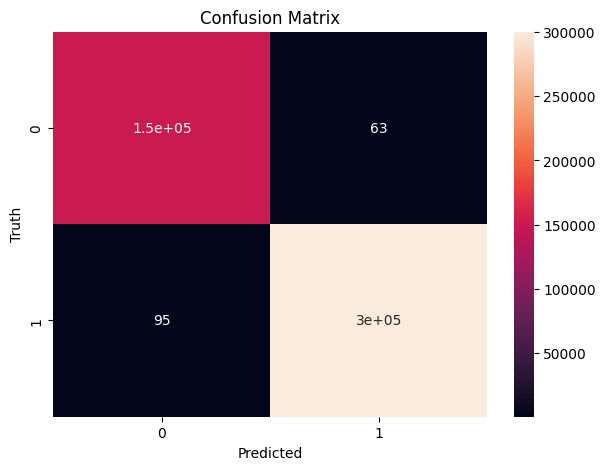

In [70]:
def confusion(X, y, algorithm):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

    # Initialize the model with specified algorithm
    model = algorithm()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix')
    
    # Display the plot
    plt.show()
    
confusion(X,y,RandomForestClassifier)    